In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.api.preprocessing.image import ImageDataGenerator
from keras.api.models import Sequential
from keras.api.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.api.applications.vgg19 import VGG19
from keras.api.applications.vgg19 import preprocess_input

# Define image size
Image_Size = [224, 224]

# Define paths
train_path = 'data/train'
test_path = 'data/test'
val_path = 'data/valid'

# Setup the ImageDataGenerator with augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Setup for validation and test data generators (only rescale, no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Creating generators to read images from directories
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=Image_Size,
    batch_size=32,
    class_mode='categorical'
)

validation_set = val_test_datagen.flow_from_directory(
    val_path,
    target_size=Image_Size,
    batch_size=32,
    class_mode='categorical'
)

test_set = val_test_datagen.flow_from_directory(
    test_path,
    target_size=Image_Size,
    batch_size=32,
    class_mode='categorical'
)

# Load the VGG19 model, pre-trained on ImageNet data
base_model = VGG19(input_shape=Image_Size + [3], weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable = False  # Freeze the layers

# Creating a model
model = Sequential([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer for 3-class classification
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


In [9]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import cv2
import tensorflow as tf; tf.keras
from tensorflow import keras
from keras.api.layers import Input, Lambda, Dense, Flatten,Dropout
from keras.api.models import Model
from keras.api.applications.vgg19 import VGG19
from keras.api.applications.vgg19 import preprocess_input
from keras.api.preprocessing import image
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.api.models import Sequential

In [10]:
# image resize
Image_Size = [224, 224]

In [12]:
train_path="data/train"
test_path="data/test"
val_path="data/valid"

x_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224, 224))
        x_train.append(img_arr)

x_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224, 224))
        x_test.append(img_arr)

x_val=[]
for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224, 224))
        x_val.append(img_arr)

In [13]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 2000 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [15]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [16]:
training_set.class_indices

{'melanoma': 0, 'nevus': 1, 'seborrheic_keratosis': 2}

In [17]:
train_y.shape,test_y.shape,val_y.shape

((2000,), (600,), (150,))

In [18]:
vgg = VGG19(input_shape=Image_Size + [3], weights='imagenet', include_top=False)

#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [19]:
x = Flatten()(vgg.output)
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(3, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [20]:
# view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,099,651 (76.67 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [21]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [22]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [23]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5742 - loss: 1.3154 - val_accuracy: 0.6200 - val_loss: 0.8510
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.7156 - loss: 0.6644 - val_accuracy: 0.5467 - val_loss: 0.9253
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.7760 - loss: 0.5640 - val_accuracy: 0.6067 - val_loss: 0.8914
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7953 - loss: 0.4989 - val_accuracy: 0.6800 - val_loss: 0.7760
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8043 - loss: 0.4712 - val_accuracy: 0.6533 - val_loss: 0.7778
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8443 - loss: 0.4241 - val_accuracy: 0.6600 - val_loss: 0.8593
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8398 - loss: 0.4049 - val_accuracy: 0.6133 - val_loss: 0.8790
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8687 - loss: 0.3727 - val_accuracy: 0.6467 - val_loss:

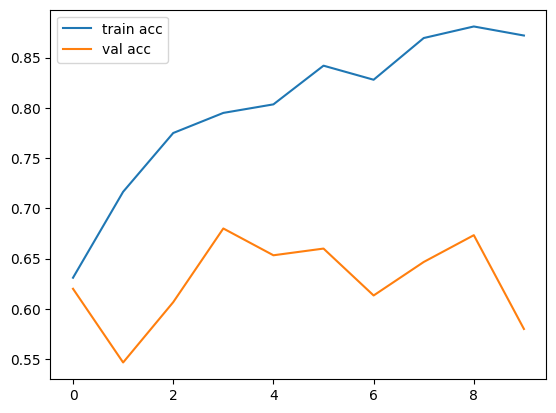

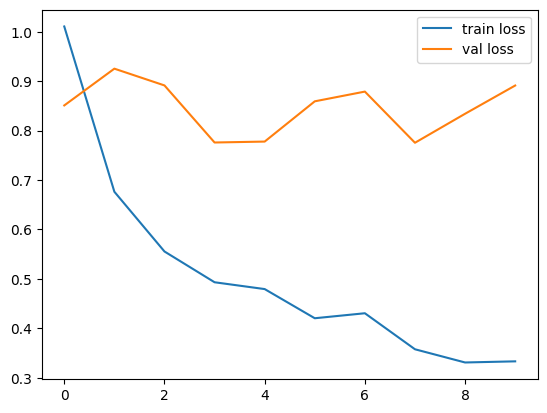

In [24]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('vgg-acc-rps-1.png')
plt.show()
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
#plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [25]:
model.evaluate(test_x,test_y,batch_size=32)

19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6044 - loss: 0.8865


[0.9213206171989441, 0.5849999785423279]

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

#get classification report
print(classification_report(y_pred,test_y))

#get confusion matrix
print(confusion_matrix(y_pred,test_y))

19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step
              precision    recall  f1-score   support

           0       0.58      0.31      0.40       221
           1       0.63      0.83      0.71       298
           2       0.41      0.46      0.43        81

    accuracy                           0.58       600
   macro avg       0.54      0.53      0.52       600
weighted avg       0.58      0.58      0.56       600

[[ 68 113  40]
 [ 39 246  13]
 [ 10  34  37]]


NYT OPPE(brug dette)

GAMMELT NEDE(brug ikke dette kun for reference)

(32, 180, 180, 3)
[1 2 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2]


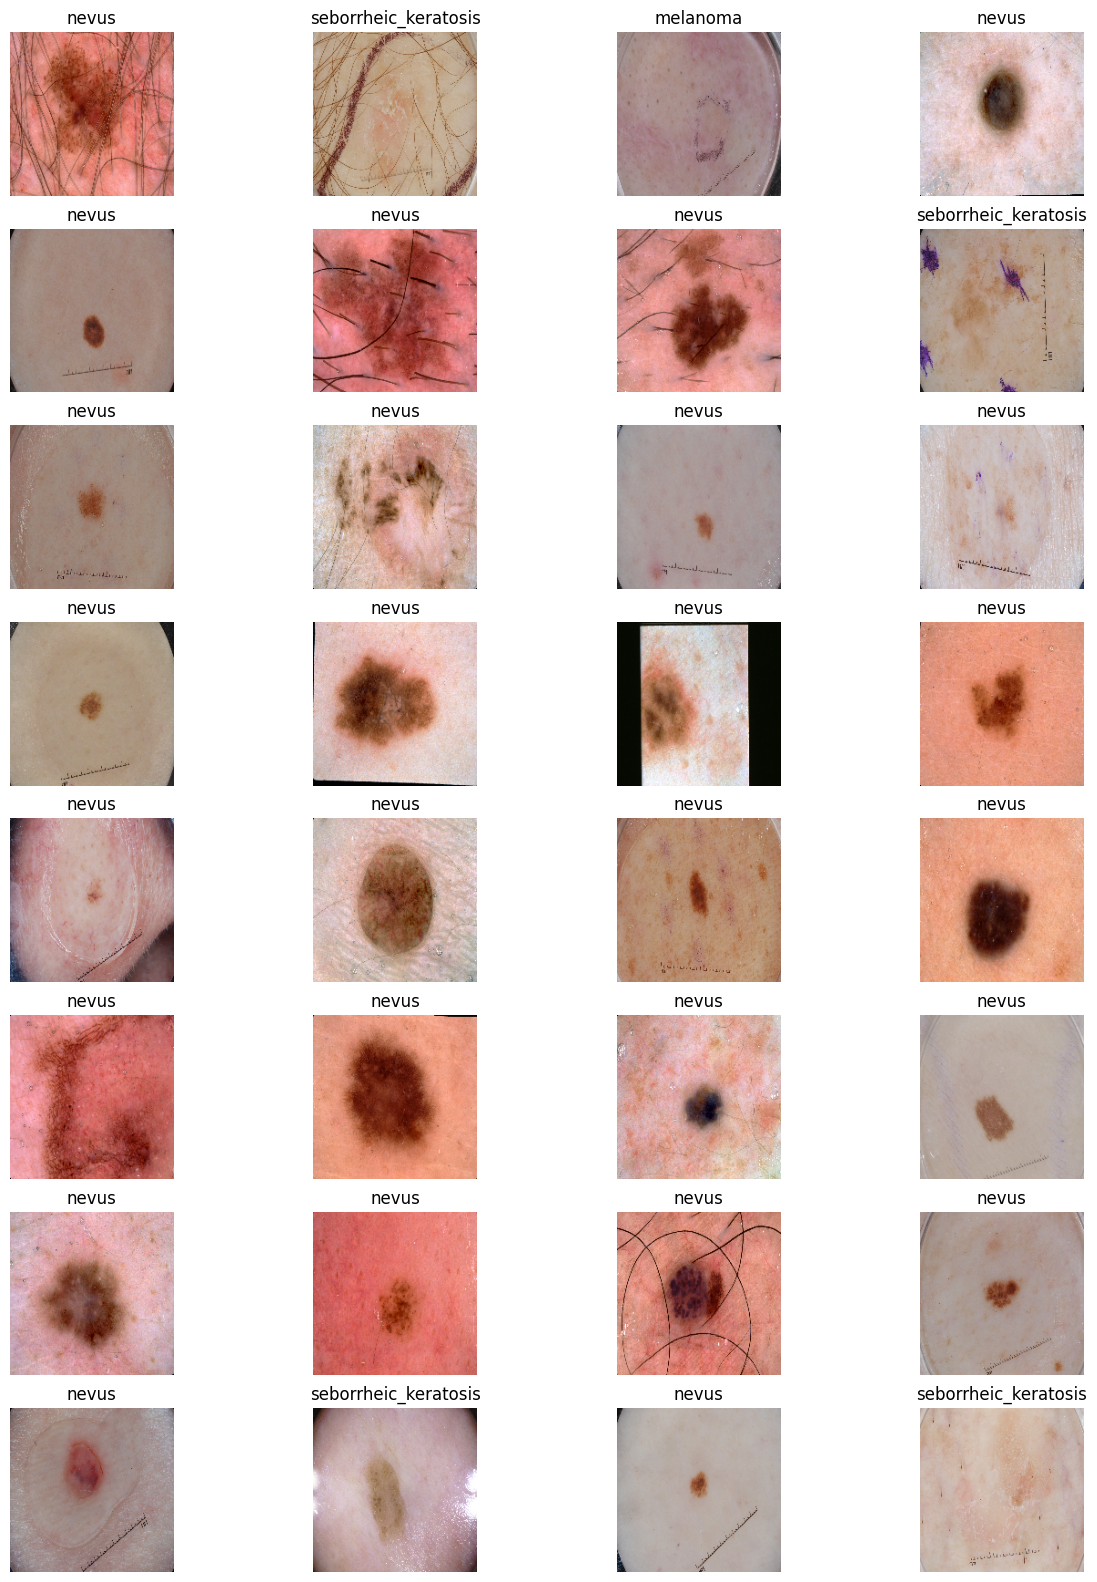

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,20))
for image_batch , labels_batch in train_ds.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())
  for i in range(32):
    plt.subplot(8,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [12]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [13]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])

In [14]:
input_shape = (batch_size , img_height , img_width , channels)

In [15]:
# create CNN model

model = Sequential()


model.add(resize_and_rescale)

model.add(data_augmentation)

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.10))

model.add(Dense(n_classes))

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.build(input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 180, 180, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 180, 180, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 180, 180, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (32, 180, 180, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (32, 90, 90, 64)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (32, 90, 90, 64)          36928     
                                                      

In [19]:
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


19/19 [==============================] - 116s 3s/step - loss: 1.0529 - accuracy: 0.5933 - val_loss: 1.0544 - val_accuracy: 0.5200
Epoch 2/5
19/19 [==============================] - 48s 3s/step - loss: 0.8869 - accuracy: 0.6533 - val_loss: 1.0359 - val_accuracy: 0.5200
Epoch 3/5
19/19 [==============================] - 49s 3s/step - loss: 0.8317 - accuracy: 0.6550 - val_loss: 0.9867 - val_accuracy: 0.5200
Epoch 4/5
19/19 [==============================] - 50s 3s/step - loss: 0.8141 - accuracy: 0.6450 - val_loss: 0.9746 - val_accuracy: 0.5133
Epoch 5/5
19/19 [==============================] - 51s 3s/step - loss: 0.7925 - accuracy: 0.6500 - val_loss: 0.9487 - val_accuracy: 0.5200


In [20]:
# accuracy of model each epochs
history.history['accuracy']

[0.5933333039283752,
 0.653333306312561,
 0.6549999713897705,
 0.6449999809265137,
 0.6499999761581421]

In [21]:
# validation accuracy of model each epochs
history.history['val_accuracy']

[0.5199999809265137,
 0.5199999809265137,
 0.5199999809265137,
 0.5133333206176758,
 0.5199999809265137]

In [22]:
# lost
history.history['loss']

[1.0529042482376099,
 0.8869280815124512,
 0.831702470779419,
 0.8141037821769714,
 0.7924818992614746]

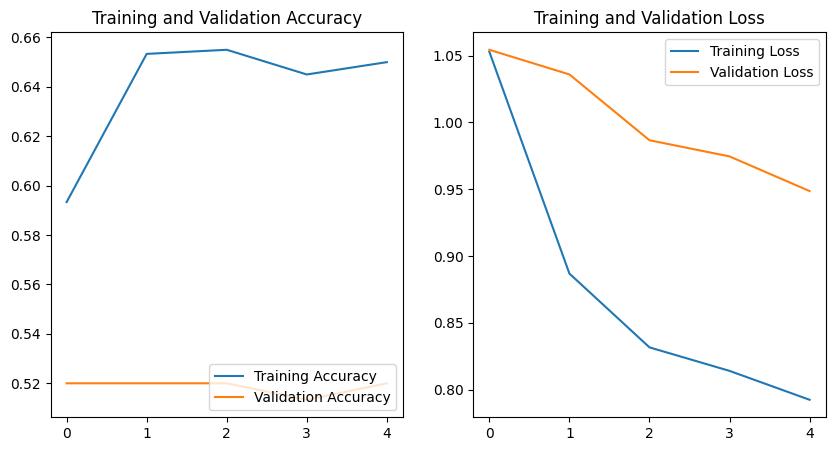

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)



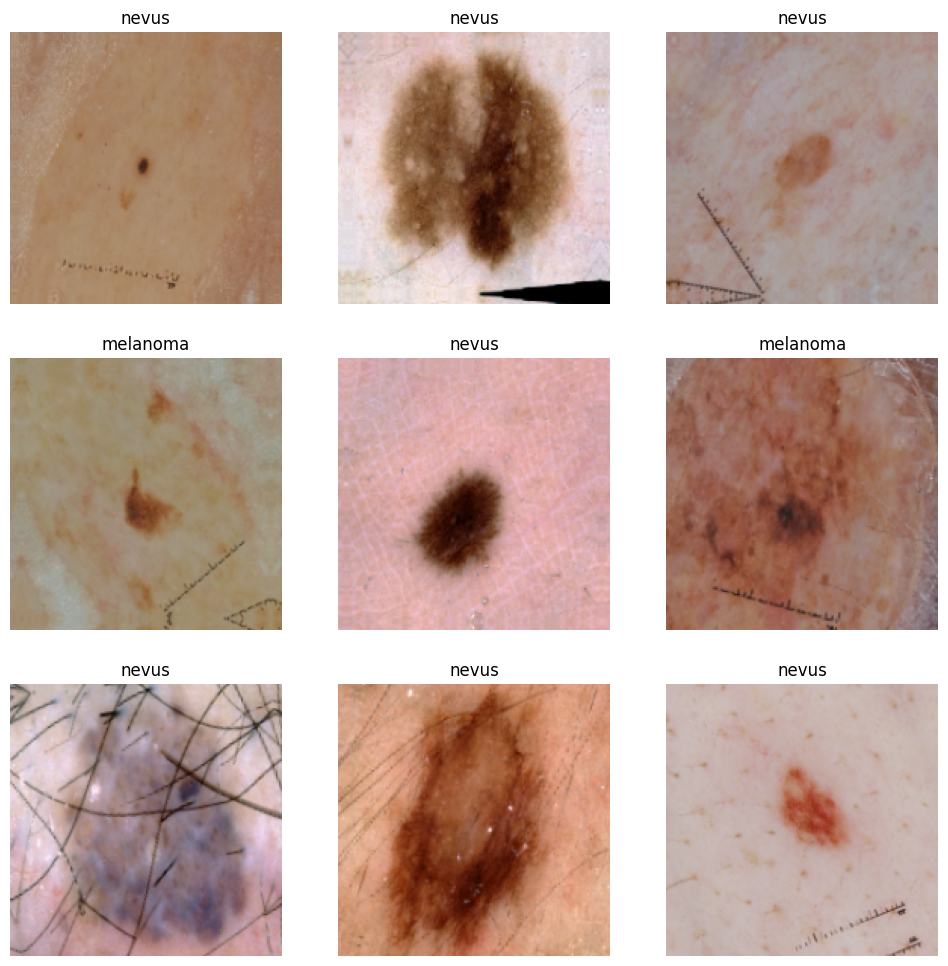

In [25]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
model = Sequential()

model.add(data_augmentation)

model.add(resize_and_rescale)

model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(2,2))


model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))


model.add(MaxPooling2D(2,2))

model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(n_classes))

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


19/19 [==============================] - 16s 650ms/step - loss: 0.9466 - accuracy: 0.6333 - val_loss: 1.0571 - val_accuracy: 0.5200
Epoch 2/20
19/19 [==============================] - 12s 645ms/step - loss: 0.8068 - accuracy: 0.6533 - val_loss: 0.9116 - val_accuracy: 0.5400
Epoch 3/20
19/19 [==============================] - 12s 636ms/step - loss: 0.7879 - accuracy: 0.6500 - val_loss: 0.9065 - val_accuracy: 0.5267
Epoch 4/20
19/19 [==============================] - 13s 664ms/step - loss: 0.7781 - accuracy: 0.6500 - val_loss: 0.9148 - val_accuracy: 0.5000
Epoch 5/20
19/19 [==============================] - 12s 644ms/step - loss: 0.7511 - accuracy: 0.6500 - val_loss: 0.9732 - val_accuracy: 0.5200
Epoch 6/20
19/19 [==============================] - 13s 667ms/step - loss: 0.7338 - accuracy: 0.6667 - val_loss: 1.0216 - val_accuracy: 0.5133
Epoch 7/20
19/19 [==============================] - 13s 696ms/step - loss: 0.7531 - accuracy: 0.6750 - val_loss: 0.9359 - val_accuracy: 0.5333
Epoch 8/20

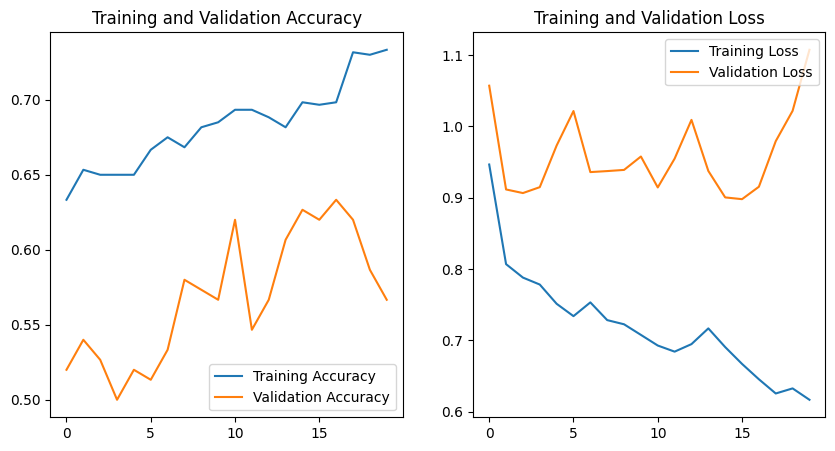

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
class_names

['melanoma', 'nevus', 'seborrheic_keratosis']

In [31]:
data_dir_train = pathlib.Path(r"C:\Skole\3.g\Programmering\Eksamen\Data\archive\skin-lesions\train")

In [32]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2000


In [33]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))

In [34]:
count

[374, 1372, 254]

<BarContainer object of 3 artists>

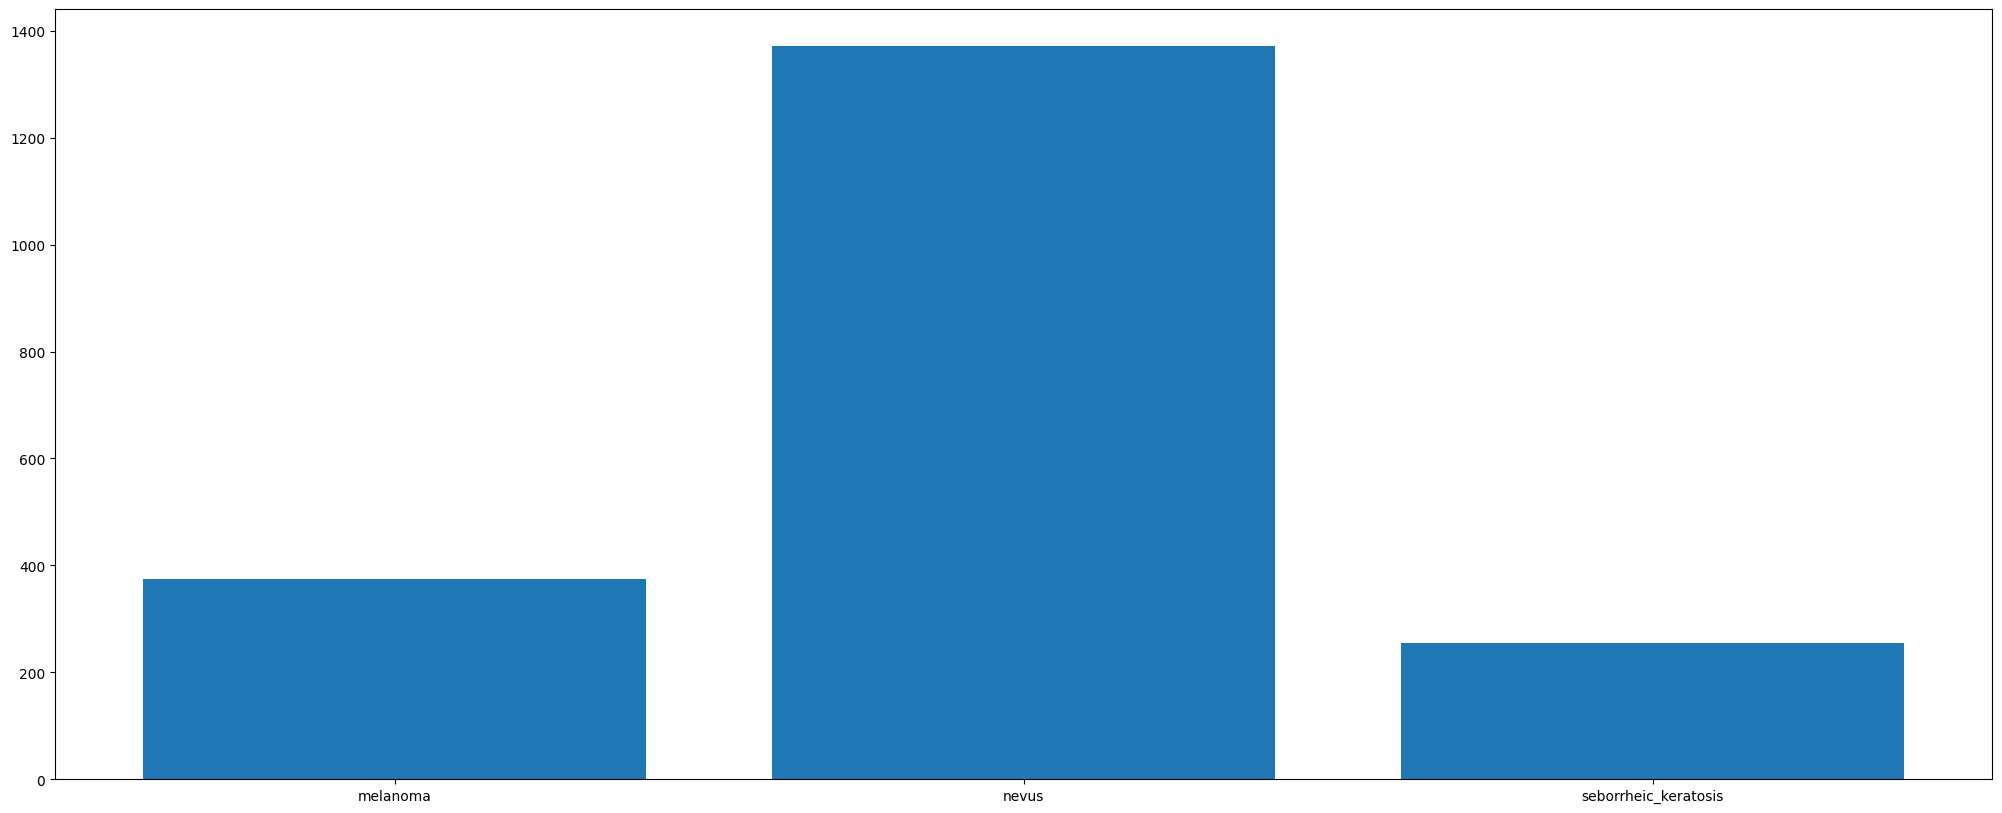

In [35]:
#plot number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [36]:
batch_size = 32
img_height = 180
img_width = 180

In [37]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 3 classes.
Using 1600 files for training.


In [38]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 3 classes.
Using 400 files for validation.


In [39]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_classes)
])

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
50/50 [==============================] - 123s 944ms/step - loss: 0.9033 - accuracy: 0.6687 - val_loss: 0.7943 - val_accuracy: 0.7000
Epoch 2/20
50/50 [==============================] - 28s 558ms/step - loss: 0.8060 - accuracy: 0.6825 - val_loss: 0.8269 - val_accuracy: 0.7000
Epoch 3/20
50/50 [==============================] - 27s 549ms/step - loss: 0.7966 - accuracy: 0.6850 - val_loss: 0.8051 - val_accuracy: 0.7000
Epoch 4/20
50/50 [==============================] - 27s 550ms/step - loss: 0.7576 - accuracy: 0.6850 - val_loss: 0.7915 - val_accuracy: 0.7100
Epoch 5/20
50/50 [==============================] - 29s 573ms/step - loss: 0.7369 - accuracy: 0.6919 - val_loss: 0.7352 - val_accuracy: 0.7100
Epoch 6/20
50/50 [==============================] - 28s 565ms/step - loss: 0.7108 - accuracy: 0.7013 - val_loss: 0.7360 - val_accuracy: 0.6925
Epoch 7/20
50/50 [==============================] - 28s 556ms/step - loss: 0.6768 - accuracy: 0.7125 - val_loss: 0.7350 - val_accuracy: 0.692

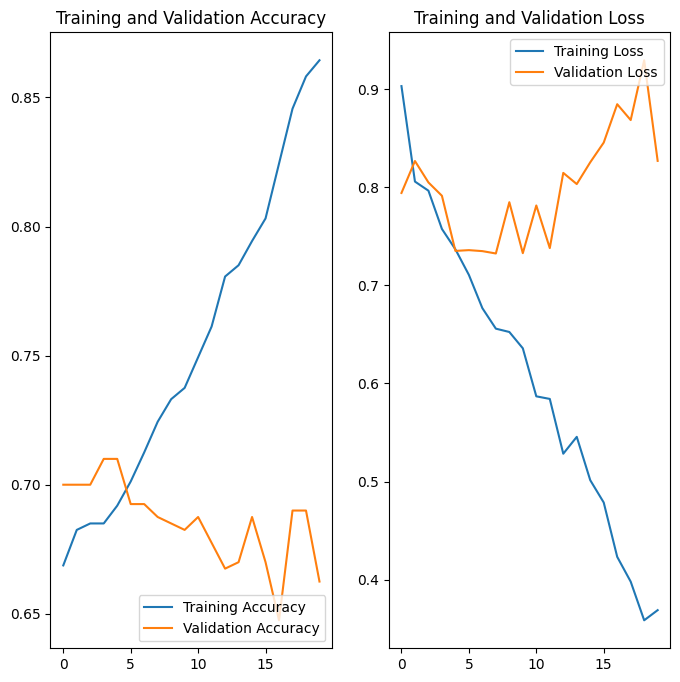

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()